<a href="https://colab.research.google.com/github/aqibfirdous/COB-DataScience/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import os


In [8]:
print(os.listdir())

['.config', 'dataset - netflix1.csv', 'sample_data']


In [9]:
df =  pd.read_csv("/content/dataset - netflix1.csv")

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [23]:
df.fillna(df.mean(), inplace=True)

<ipython-input-23-97e3bf5fe10e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [24]:
from scipy import stats
numeric_columns = df.select_dtypes(include=[float, int])
z_scores = stats.zscore(numeric_columns)
threshold =3
outlier_indices = (z_scores > threshold).any(axis=1)
df_no_outliers = df[~outlier_indices]
df_no_outliers.fillna(df_no_outliers.mean(), inplace=True)

<ipython-input-24-021efe013bed>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_no_outliers.fillna(df_no_outliers.mean(), inplace=True)


<Axes: >

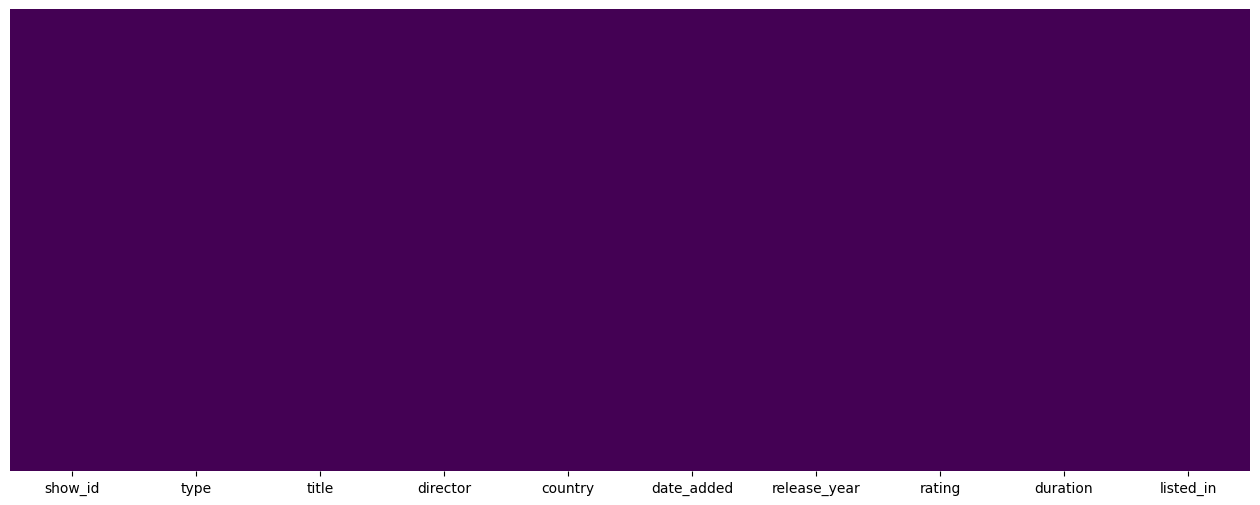

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')